In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="chQQqFnE0EfnTtXiohsZ")
project = rf.workspace("paddy-pest-detection2").project("paddy-pest-detection3")
version = project.version(1)
dataset = version.download("coco-segmentation")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to paddy-pest-detection3-1 in coco-segmentation:: 100%|██████████| 1256/1256 [00:00<00:00, 4969.99it/s]


In [4]:
print(f"Dataset is downloaded to: {dataset.location}")

Dataset is downloaded to: /kaggle/working/paddy-pest-detection3-1


In [5]:
root_path=dataset.location
root_path

'/kaggle/working/paddy-pest-detection3-1'

In [6]:
import json

# Define the file path
file_path = os.path.join(root_path, "train", "_annotations.coco.json")

# Open and load the JSON file
with open(file_path, 'r') as file:
    coco_data = json.load(file)

# Extract and print the categories
categories = coco_data['categories']
categories

[{'id': 0, 'name': 'paddy-pest-detection', 'supercategory': 'none'},
 {'id': 1,
  'name': 'Paddy with pests',
  'supercategory': 'paddy-pest-detection'},
 {'id': 2,
  'name': 'Paddy without pests',
  'supercategory': 'paddy-pest-detection'}]

In [7]:
annotations = coco_data['annotations']
annotations[0]

{'id': 0,
 'image_id': 0,
 'category_id': 2,
 'bbox': [2, 0, 637.594, 636.8],
 'area': 406019.85,
 'segmentation': [[2.406, 0, 2.406, 636.8, 640, 636.8, 640, 0, 2.406, 0]],
 'iscrowd': 0}

In [8]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-24fjonb6
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-24fjonb6
  Resolved https://github.com/facebookresearch/detectron2.git to commit b1c43ffbc995426a9a6b5c667730091a384e0fa4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 40.5 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6338726 sha256=8b89b1ee6629b5d3da6548dcbee1ac869ffe3ab4fa089db92f1efad2d112d266
  Stored in directory: /tmp/pip-ephem-wheel-cache-febz5n8b/wheels/47/e5/15/94c80df2ba85500c5

In [9]:
import detectron2
print(detectron2.__version__)

0.6


In [10]:
from detectron2 import data
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.logger import setup_logger

# Set up logging
setup_logger()


# Register the datasets with COCO format
register_coco_instances(name="paddy_pest_train", metadata={}, json_file=os.path.join(root_path, "train", "_annotations.coco.json"), image_root=os.path.join(root_path, "train"))
register_coco_instances(name="paddy_pest_valid", metadata={}, json_file=os.path.join(root_path, "valid", "_annotations.coco.json"), image_root=os.path.join(root_path, "valid"))
register_coco_instances(name="paddy_pest_test", metadata={}, json_file=os.path.join(root_path, "test", "_annotations.coco.json"), image_root=os.path.join(root_path, "test"))

In [11]:
from detectron2.data import MetadataCatalog,DatasetCatalog

[data_set for data_set in MetadataCatalog.list() if data_set.startswith("paddy_pest")]

['paddy_pest_train', 'paddy_pest_valid', 'paddy_pest_test']

In [12]:
import cv2
from detectron2.utils.visualizer import Visualizer

metadata=MetadataCatalog.get('paddy_pest_train')
dataset_train=DatasetCatalog.get('paddy_pest_train')

dataset_entry=dataset_train[0]
image=cv2.imread(dataset_entry["file_name"])
image = image[:, :, ::-1]  # Convert from BGR to RGB (OpenCV loads images in BGR by default)

# Initialize the Visualizer object with the image and metadata
v = Visualizer(image, metadata=metadata, scale=1.2)

# Draw the annotations (bounding boxes, segmentation, etc.) on the image
v = v.draw_dataset_dict(dataset_entry)

WARNING [12/30 16:21:11 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/30 16:21:11 d2.data.datasets.coco]: Loaded 1092 images in COCO format from /kaggle/working/paddy-pest-detection3-1/train/_annotations.coco.json


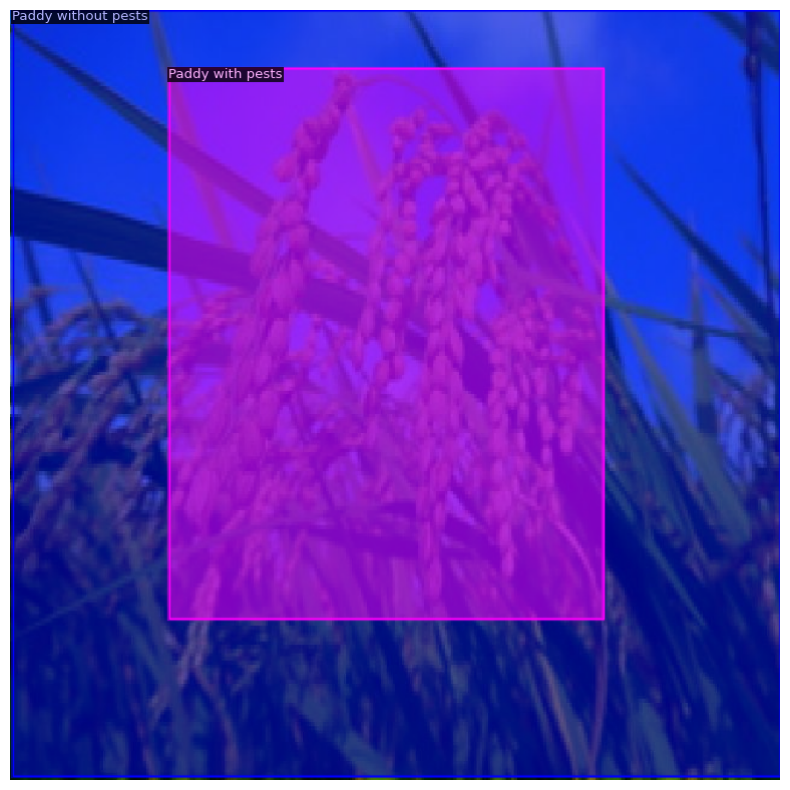

In [13]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(v.get_image())
plt.axis('off')  # Turn off axis labels
plt.show()

In [14]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo
import torch

# Initialize the Detectron2 configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("paddy_pest_train",)
cfg.DATASETS.TEST = ("paddy_pest_valid",)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE=64
cfg.TEST.EVAL_PERIOD=200
cfg.DATALOADER.NUM_WORKERS=2
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.INPUT.MASK_FORMAT='bitmask'
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 3000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # For "with pest" and "without pest"
cfg.OUTPUT_DIR = "./output"
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [15]:
# Create the Trainer object for Mask R-CNN
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

# Start training
trainer.train()

[12/30 16:21:14 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_a3ec72.pkl: 254MB [00:01, 191MB/s]                           


[12/30 16:21:16 d2.engine.train_loop]: Starting training from iteration 0


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)


[12/30 16:21:29 d2.utils.events]:  eta: 0:20:45  iter: 19  total_loss: 2.254  loss_cls: 1.071  loss_box_reg: 0.4956  loss_mask: 0.6829  loss_rpn_cls: 0.02216  loss_rpn_loc: 0.01676    time: 0.4245  last_time: 0.4465  data_time: 0.0168  last_data_time: 0.0059   lr: 1.9981e-05  max_mem: 2416M
[12/30 16:21:52 d2.utils.events]:  eta: 0:20:36  iter: 39  total_loss: 1.783  loss_cls: 0.6409  loss_box_reg: 0.4547  loss_mask: 0.6371  loss_rpn_cls: 0.01753  loss_rpn_loc: 0.01546    time: 0.4236  last_time: 0.4131  data_time: 0.0069  last_data_time: 0.0075   lr: 3.9961e-05  max_mem: 2416M
[12/30 16:22:01 d2.utils.events]:  eta: 0:20:37  iter: 59  total_loss: 1.392  loss_cls: 0.3411  loss_box_reg: 0.4029  loss_mask: 0.574  loss_rpn_cls: 0.008559  loss_rpn_loc: 0.0127    time: 0.4240  last_time: 0.4249  data_time: 0.0073  last_data_time: 0.0057   lr: 5.9941e-05  max_mem: 2416M
[12/30 16:22:10 d2.utils.events]:  eta: 0:20:34  iter: 79  total_loss: 1.352  loss_cls: 0.2919  loss_box_reg: 0.474  loss_m

In [16]:
%load_ext tensorboard

%tensorboard --logdir ./output

<IPython.core.display.Javascript object>

[12/30 16:45:25 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


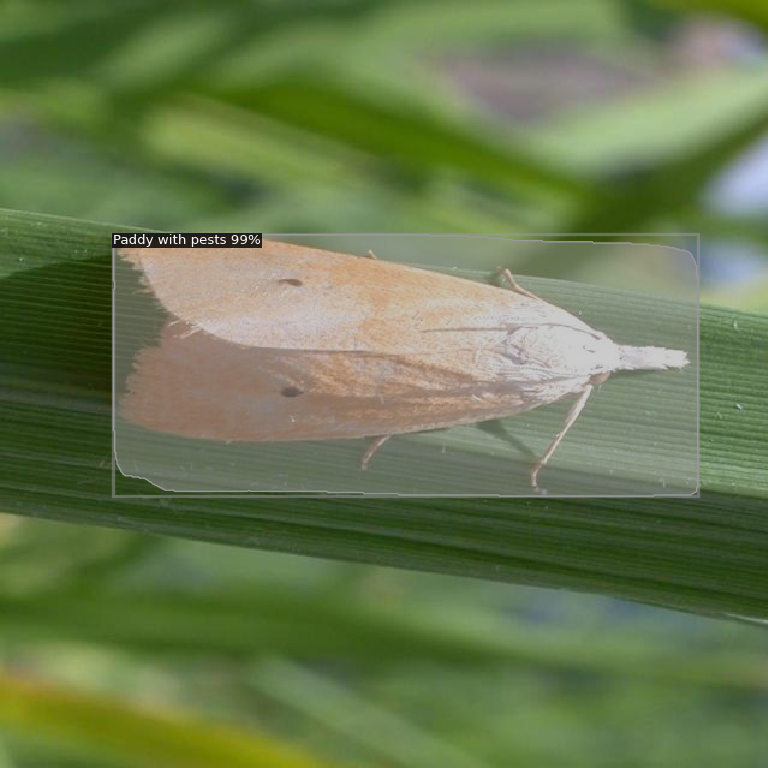

In [17]:
from detectron2.engine import DefaultPredictor
from google.colab.patches import cv2_imshow

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR,"model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
predictor=DefaultPredictor(cfg)


# Step 7: Load an image using OpenCV
image = cv2.imread("/kaggle/working/paddy-pest-detection3-1/test/00000000_jpg.rf.7a2f53a0d5cf6dbabb9de301454f4b59.jpg")

# Step 8: Run inference
outputs = predictor(image)

# Step 9: Visualize the predictions
metadata = MetadataCatalog.get("paddy_pest_train")  # Use the correct dataset name
v = Visualizer(image[:, :, ::-1], metadata=metadata, scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Step 10: Display the image with predictions
cv2_imshow(v.get_image()[:, :, ::-1])

In [18]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Step 1: Explicitly set evaluator arguments
evaluator = COCOEvaluator(
    dataset_name="paddy_pest_valid",  # Validation dataset name
    output_dir=cfg.OUTPUT_DIR,
    distributed=False,
)

# Step 2: Build the validation data loader
val_loader = build_detection_test_loader(cfg, "paddy_pest_valid")

# Step 3: Load the trained model
model = trainer.model

# Step 4: Evaluate the model
results = inference_on_dataset(model, val_loader, evaluator)

# Step 5: Print evaluation results
print("Evaluation Results:", results)


WARNING [12/30 16:45:26 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/30 16:45:26 d2.data.datasets.coco]: Loaded 104 images in COCO format from /kaggle/working/paddy-pest-detection3-1/valid/_annotations.coco.json
[12/30 16:45:26 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[12/30 16:45:26 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[12/30 16:45:26 d2.data.common]: Serializing 104 elements to byte tensors and concatenating them all ...
[12/30 16:45:26 d2.data.common]: Serialized dataset takes 0.05 MiB
[12/30 16:45:26 d2.evaluation.evaluator]: Start inference on 104 batches


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


[12/30 16:45:28 d2.evaluation.evaluator]: Inference done 11/104. Dataloading: 0.0016 s/iter. Inference: 0.1143 s/iter. Eval: 0.0014 s/iter. Total: 0.1172 s/iter. ETA=0:00:10
[12/30 16:45:33 d2.evaluation.evaluator]: Inference done 54/104. Dataloading: 0.0017 s/iter. Inference: 0.1146 s/iter. Eval: 0.0022 s/iter. Total: 0.1187 s/iter. ETA=0:00:05
[12/30 16:45:38 d2.evaluation.evaluator]: Inference done 96/104. Dataloading: 0.0018 s/iter. Inference: 0.1154 s/iter. Eval: 0.0020 s/iter. Total: 0.1193 s/iter. ETA=0:00:00
[12/30 16:45:39 d2.evaluation.evaluator]: Total inference time: 0:00:11.881632 (0.120016 s / iter per device, on 1 devices)
[12/30 16:45:39 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.115556 s / iter per device, on 1 devices)
[12/30 16:45:39 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[12/30 16:45:39 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[12/30 16:45:39 d2.evaluation.coco_